# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
# Combine the data into a single dataset
#mouse_metadata.head()
#study_results.head()

merge_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

# Checking the number of mice.
mice_count = merge_data["Mouse ID"].count()

mice_count

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merge_data.drop_duplicates(subset="Mouse ID")
           
# Checking the number of mice in the clean DataFrame.
clean_mice_count = df["Mouse ID"].count()

clean_mice_count

# Display the data table for preview (non-duplicates)
non_dup = df.reset_index(drop=True)
non_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_df = merge_data.groupby("Drug Regimen")

total_mice = grouped_df["Mouse ID"].count()

#tumor volume mean per regimen
mean_tv = grouped_df["Tumor Volume (mm3)"].mean()


#tumor volume median per regimen
median_tv = grouped_df["Tumor Volume (mm3)"].median()


#variance of tumor volume per regimen
variance_tv = grouped_df["Tumor Volume (mm3)"].var()


#standard deviation of tumor volume per regimen
std_tv = grouped_df["Tumor Volume (mm3)"].std()


#compute SEM
sem_tv = grouped_df["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#table
summary_stats = pd.DataFrame({ "Mean Tumor Volume": mean_tv,
                              "Median Tumor Volume": median_tv, "Tumor Volume Variance": variance_tv, 
                              "Tumor Volume Std. Dev.": std_tv, "Tumor Volume Std. Err.": sem_tv})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = merge_data.groupby('Drug Regimen')
summary_table = summary_table.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
#summary_table = summary_table.rename(columns={"mean":"Mean Tumor Volume",
#                                                "median":"Median Tumor Volume",
#                                                "var":"Tumor Volume Variance",
#                                                "std": "Tumor Volume Std. Dev.",
#                                                 "sem": "Tumor Volume Std. Err." })
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    
# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

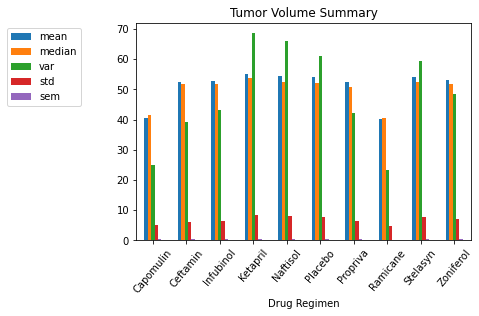

In [16]:
bar_chart = summary_table.plot.bar(rot=50).legend(loc='upper left',bbox_to_anchor=(-.4, 1.0));

plt.title("Tumor Volume Summary")
plt.show()

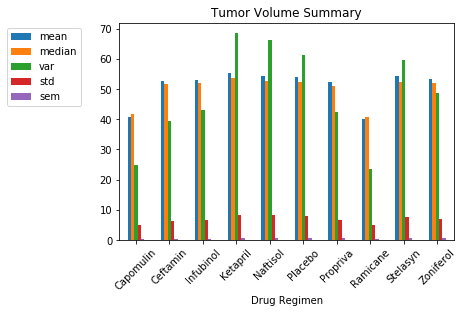

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

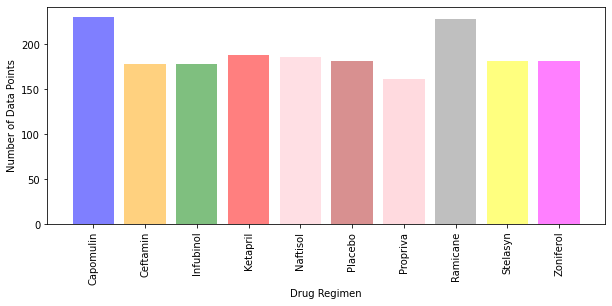

In [17]:
x_axis = summary_table.index.tolist()
y_axis = (merge_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
colors = ('blue', 'orange', 'green', 'red', 'pink', 'firebrick', 'lightpink', 'gray', 'yellow', 'magenta')
# Create a bar chart based upon the above data


plt.figure(figsize=(10,4))
plt.bar(x_axis, y_axis, color=colors, alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()

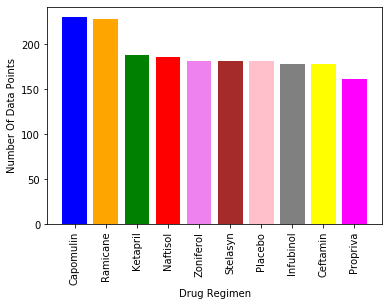

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

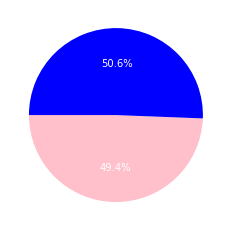

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

#grab data by gender
gender_df = pd.DataFrame(merge_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()

#create chart of gender and count
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

#create pie plot
pie_1 = gender_df.plot(kind='pie', y="Count", autopct='%1.1f%%', colors= ['pink','blue'],
 startangle=180, shadow=False, labels=['',''], textprops={'color':"w"}, legend = False)
pie_1.set_ylabel('')
plt.show()

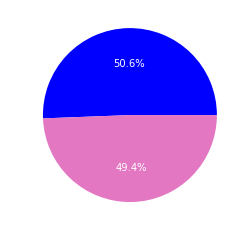

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

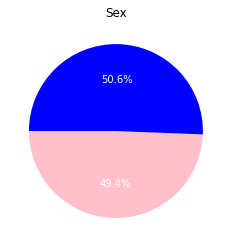

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
count = gender_df["Count"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(count, colors=colors,
        autopct="%1.1f%%",startangle=180, textprops={'color':"w"})
plt.title("Sex")
plt.show()

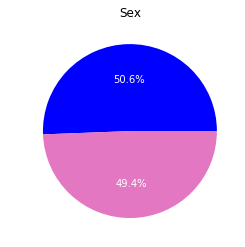

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin",:]
ram_df = merge_data.loc[merge_data["Drug Regimen"] == "Ramicane", :]
inf_df = merge_data.loc[merge_data["Drug Regimen"] == "Infubinol", :]
ceft_df = merge_data.loc[merge_data["Drug Regimen"] == "Ceftamin", :]
cap_df.head()
# Start by getting the last (greatest) timepoint for each mous
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_last = pd.DataFrame(caplast)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merge = pd.merge(cap_last, merge_data, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head(5)

# Quantitatively determine capomulin outliers
#capomulin ouliers
tumors = cap_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")    
    
    

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [21]:
# Quantitatively determine ramicane outliers
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_last = pd.DataFrame(ramlast)
ram_merge = pd.merge(ram_last, merge_data, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head(10)

#Ramicane outliers
tumors2 = ram_merge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [22]:
# Quantitatively determine infubinol outliers
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_last = pd.DataFrame(inflast)
inf_merge = pd.merge(inf_last, merge_data, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head(10)

#Infubinol outliers
tumors3 = inf_merge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [23]:
# Quantitatively determine ceftamin outliers
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_last = pd.DataFrame(ceftlast)
ceft_merge = pd.merge(ceft_last, merge_data, on=("Mouse ID","Timepoint"),how="left")
ceft_merge.head(10)

#Ceftamin outliers
tumors4 = ceft_merge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


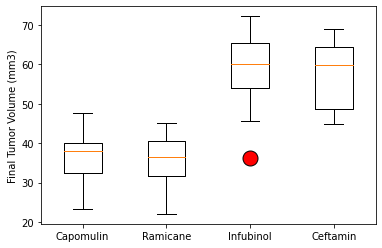

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

red_circle = dict(markerfacecolor='r', marker='o', markersize=15)
ax1.boxplot(data_to_plot, flierprops=red_circle, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

#plt.savefig('boxplot')
plt.show()

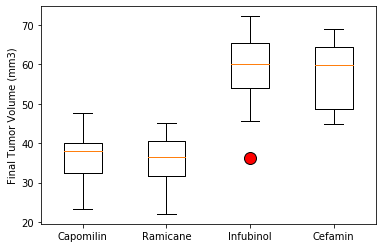

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

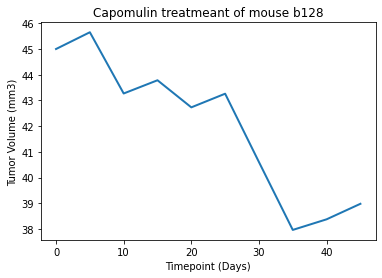

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = cap_df.loc[cap_df["Mouse ID"] == "b128",:]
line_df.head()

x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]


plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse b128')
#plt.savefig('linechart')
plt.show()

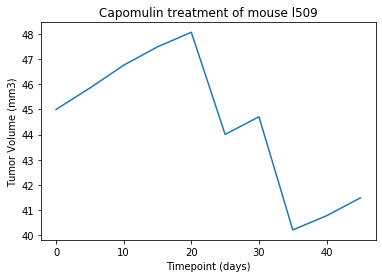

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

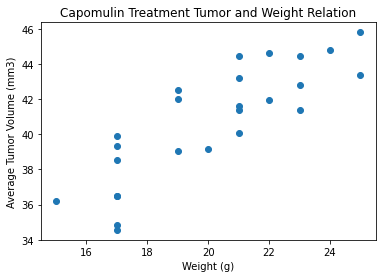

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment Tumor and Weight Relation')
#plt.savefig('scatterplot')
plt.show()

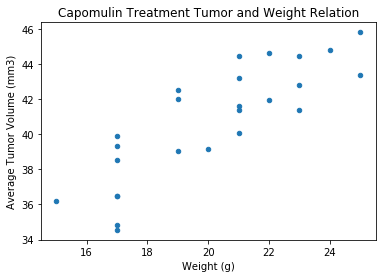

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


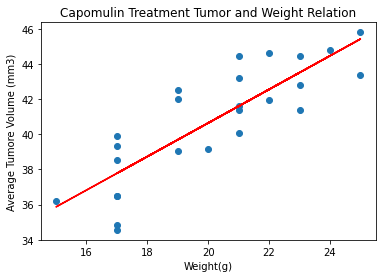

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg['Weight (g)'],avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model=st.linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
model
#avg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = avg['Weight (g)']*mslope+bintercept
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.plot(avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Capomulin Treatment Tumor and Weight Relation')

#plt.savefig('linearregression')
plt.show()


The correlation between mouse weight and average tumor volume is 0.84.


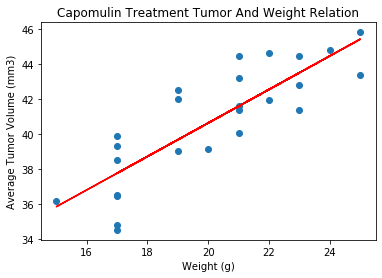

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen